# Customer Churn Analysis and Prediction using Classification
Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

# CRISP-DM Framework for Customer Churn Project

## Business Understanding

This initial phase focuses on understanding the project objectives and requirements from a business perspective, then converting this knowledge into a data mining problem definition.

## Define Objectives:

1. **Predict Customer Churn**: Understand which customers are likely to leave, allowing the business to take proactive steps.
2. **Understand Key Indicators**: Identify primary reasons or indicators that lead to customer churn, which aids in addressing the root causes.
3. **Devise Retention Strategies**: Based on the identified reasons, craft strategies to retain customers, ensuring sustained business growth.

#### Translate to Data Mining Problem:

The above objectives convert to a **Binary Classification Problem** in data mining:

- **1 (Churn)**: The customer will likely terminate their subscription or stop using the service.
- **0 (No Churn)**: The customer will continue with the service.

By solving this classification problem, actionable insights can be derived to achieve the set objectives.


## 2. Data Understanding

In this phase, you gather the data, become familiar with it, identify data quality issues, and get initial insights.

- **Activities**:
  - Collecting initial data.
  - Describing and exploring the data.
  - Verifying data quality.

## 3. Data Preparation

This phase involves cleaning the data, handling missing values, and possibly transforming data into a format suitable for modeling.

- **Steps**:
  - Data cleaning (handling missing values, outliers).
  - Feature engineering (creating new attributes, transforming existing ones).
  - Data encoding (e.g., converting categorical data to numeric format).

## 4. Modeling

Here, various modeling techniques are selected and applied. Models are calibrated to optimal parameters, if necessary.

- **Key Tasks**:
  - Selecting potential models (e.g., Decision Trees, Logistic Regression).
  - Training models using the training dataset.
  - Assessing model quality and performance.

## 5. Evaluation

Before proceeding to final deployment, the model needs rigorous evaluation to ensure it meets business objectives and achieves desired performance.

- **Activities**:
  - Testing the model on unseen data.
  - Reviewing model outcomes against business objectives.
  - Determining if the model is ready for deployment or needs refinement.

## 6. Deployment

The manner of deployment depends on the requirements, be it through a live application interface, periodic batch scoring, or other methods.

- **Considerations**:
  - Integration with business systems.
  - Monitoring model performance over time.
  - Setting up retraining procedures as new data becomes available.

By following the CRISP-DM framework, the customer churn project is structured to ensure that both technical and business objectives are met efficiently.




## Data Understanding
The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

# Setup

# Installation

In [1]:
'''
%pip install pandas 
%pip install pyodbc  
%pip install python-dotenv 
%pip install openpyxl
%pip install pandas-profiling
%pip install plotly 
%pip install scikit-learn
%pip install --upgrade jupyter ipywidgets
%pip install imbalanced-learn
pip freeze > requirements.txt
'''

'\n%pip install pandas \n%pip install pyodbc  \n%pip install python-dotenv \n%pip install openpyxl\n%pip install pandas-profiling\n%pip install plotly \n%pip install scikit-learn\n%pip install --upgrade jupyter ipywidgets\n%pip install imbalanced-learn\n'

# Import necessary libraries and models

In [2]:

# Database connection
import pyodbc 

# For securely storing and accessing environment variables and configurations
from dotenv import dotenv_values 

# For data manipulation and analysis
import pandas as pd 
import numpy as np

# For detailed exploratory data analysis
from ydata_profiling import ProfileReport 

# Data visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker 
%matplotlib inline 
import plotly.express as px 
color = sns.color_palette() 
import matplotlib.colors as mcolors 
import plotly.subplots as sp 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 
from plotly.io import write_html

from scipy.stats import chi2_contingency 

# Data preprocessing - handling missing data
from sklearn.impute import SimpleImputer 

# Suppressing warnings for cleaner output
import warnings 
warnings.filterwarnings('ignore') 

# Tools related to Jupyter Notebook interface 
import jupyter 
import ipywidgets 

# Handling class imbalance by oversampling
from imblearn.over_sampling import SMOTE 

# Splitting datasets and preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
 
# Machine Learning algorithms/models
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB

# Metrics and tools for evaluating models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix, classification_report 

# Hyperparameter tuning tool
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import make_scorer 

from sklearn.metrics import roc_curve

import pickle


# Load the remote dataset(first dataset)

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")



connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [5]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)

# Load Test dataset.

In [6]:
excel_file = 'Telco-churn-second-2000.xlsx'

# Read the Excel file into a Pandas DataFrame
df_test = pd.read_excel(excel_file, engine='openpyxl')
# Save the DataFrame as a CSV file
df_test.to_csv('df_test.csv', index=False)

# Load Third Dataset

In [7]:
data3 = pd.read_csv('LP2_Telco-churn-last-2000.csv')

# Hypothesis
## Null Hypothesis (H0):
### There's no significant association between tenure and churn.

## Alternative Hypothesis (HA):
### There's a significant association between tenure and churn.

## Research / Analysis Questions
1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?

2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?

3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?

4. What is the average monthly charges and total charges for customers who churned and those who didn't?

5. What is the churn rate based on the tenure of customers with the company?

6. What is the distribution of monthly charges for customers who churned versus those who did not churn?

7. How does the distribution of total charges incurred by customers relate to churn rates?

8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?

9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

# Cleaning First Dataset

In [8]:
data.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure   
0  7590-VHVEG  Female          False     True       False       1  \
1  5575-GNVDE    Male          False    False       False      34   
2  3668-QPYBK    Male          False    False       False       2   
3  7795-CFOCW    Male          False    False       False      45   
4  9237-HQITU  Female          False    False       False       2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...   
0         False          None             DSL          False  ...  \
1          True         False             DSL           True  ...   
2          True         False             DSL           True  ...   
3         False          None             DSL           True  ...   
4          True         False     Fiber optic          False  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract   
0            False       False       False           False  Month-to-month  \
1             True       False       False           False        One year   
2            False       False       False           False  Month-to-month   
3             True        True       False           False        One year   
4            False       False       False           False  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges   
0             True           Electronic check      29.850000     29.850000  \
1            False               Mailed check      56.950001   1889.500000   
2             True               Mailed check      53.849998    108.150002   
3            False  Bank transfer (automatic)      42.299999   1840.750000   
4             True           Electronic check      70.699997    151.649994   

   Churn  
0  False  
1  False  
2   True  
3  False  
4   True  

[5 rows x 21 columns]

In [9]:
data.shape

(3000, 21)

In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [12]:
data.describe()

tenure  MonthlyCharges  TotalCharges
count  3000.000000     3000.000000   2995.000000
mean     32.527333       65.347400   2301.278315
std      24.637768       30.137053   2274.987884
min       0.000000       18.400000     18.799999
25%       9.000000       35.787499    415.250000
50%      29.000000       70.900002   1404.650024
75%      56.000000       90.262501   3868.725098
max      72.000000      118.650002   8564.750000

In [13]:
data.duplicated().sum()

0

In [14]:
data.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], inplace=True)

In [15]:
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      646
OnlineBackup        646
DeviceProtection    646
TechSupport         646
StreamingTV         646
StreamingMovies     646
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [16]:
# Calculate the % of missing values in the dataset
missing_values_percent = data.isna().mean().round(4) * 100
print(missing_values_percent)

customerID           0.00
gender               0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
tenure               0.00
PhoneService         0.00
MultipleLines        8.99
InternetService      0.00
OnlineSecurity      21.58
OnlineBackup        21.58
DeviceProtection    21.58
TechSupport         21.58
StreamingTV         21.58
StreamingMovies     21.58
Contract             0.00
PaperlessBilling     0.00
PaymentMethod        0.00
MonthlyCharges       0.00
TotalCharges         0.17
Churn                0.03
dtype: float64


In our analysis, we are using a threshold of 30% for missing values. Columns with missing values above this threshold will be considered for removal.

In this case, no column has more than 30% missing data, so all columns are retained. For those columns with missing data below this threshold, we will perform imputation to fill in the missing values.

In [17]:
# Fill Null with mode in categorical dataset
columns_to_fill = ['MultipleLines',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

for column in columns_to_fill:
    data[column].fillna(data[column].mode()[0], inplace=True)

To ensure that our data is correctly processed by our model, we need to make sure that each feature is of the correct data type. 

In [18]:
#change the dtype for SeniorCitizen column to be same as other datasets
data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)

In [19]:
# change dtype from bool to object in categorical columns
cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
# Convert bool to str in df2
for col in cols:
    data[col] = data[col].astype(str)

# Consistent representation
for col in cols:
    data[col] = data[col].map({'True': 'Yes', 'False': 'No'})
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0            No             DSL             No  ...               No  \
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No          No              No  Month-to-month              Yes  \
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check      29.850000     29.850000     No  
1               Mailed check      56.950001   1889.500000     No  
2               Mailed check      53.849998    108.150002    Yes  
3  Bank transfer (automatic)      42.299999   1840.750000     No  
4           Electronic check      70.699997    151.649994    Yes  

[5 rows x 21 columns]

## Check for outliers in the TotalCharges  column

In [20]:
Q1 = data['TotalCharges'].quantile(0.25)
Q3 = data['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['TotalCharges'] < lower_bound) | (data['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 0 outliers in TotalCharges.


There are no outliers. The mean can be used to impute missing values in the TotalCharges Column

In [21]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

data.TotalCharges = imputer.fit_transform(data["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [22]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)
data['tenure_group'].value_counts()

tenure_group
1 - 12     919
61 - 72    614
13 - 24    430
25 - 36    364
49 - 60    340
37 - 48    321
Name: count, dtype: int64

Remove column not needed

In [23]:
#drop column customerID
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [24]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        5
dtype: int64

In [25]:
data = data.dropna(subset=['tenure_group'])

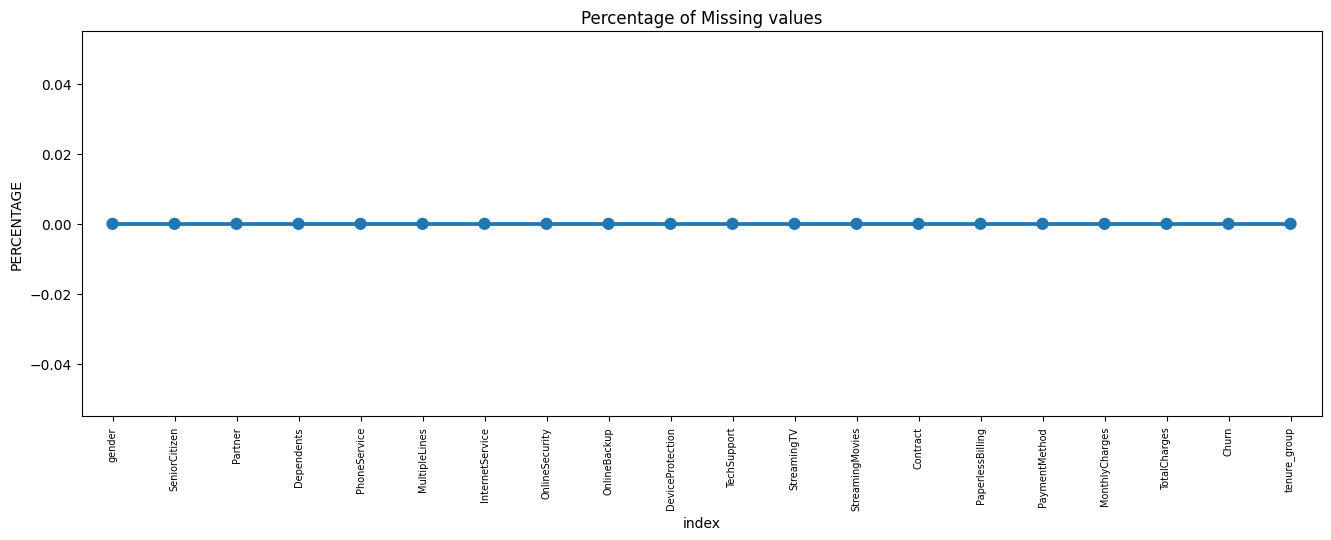

In [26]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [27]:
data.head()

gender  SeniorCitizen Partner Dependents PhoneService MultipleLines   
0  Female              0     Yes         No           No            No  \
1    Male              0      No         No          Yes            No   
2    Male              0      No         No          Yes            No   
3    Male              0      No         No           No            No   
4  Female              0      No         No          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport   
0             DSL             No          Yes               No          No  \
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No              No  Month-to-month              Yes  \
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check       29.850000     29.850000    No       1 - 12  
1               Mailed check       56.950001   1889.500000    No      25 - 36  
2               Mailed check       53.849998    108.150002   Yes       1 - 12  
3  Bank transfer (automatic)       42.299999   1840.750000    No      37 - 48  
4           Electronic check       70.699997    151.649994   Yes       1 - 12

# Cleaning Test Dataset

In [28]:
df_test.head()

customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7613-LLQFO   Male              0      No         No      12          Yes  \
1  4568-TTZRT   Male              0      No         No       9          Yes   
2  9513-DXHDA   Male              0      No         No      27          Yes   
3  2640-PMGFL   Male              0      No        Yes      27          Yes   
4  3801-HMYNL   Male              0     Yes        Yes       1          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup   
0           Yes     Fiber optic                   No                   No  \
1            No              No  No internet service  No internet service   
2            No             DSL                  Yes                   No   
3           Yes     Fiber optic                   No                   No   
4            No     Fiber optic                   No                   No   

      DeviceProtection          TechSupport          StreamingTV   
0                   No                   No                  Yes  \
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                   No                  Yes                   No   
4                   No                   No                  Yes   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod   
0                   No  Month-to-month              Yes  Electronic check  \
1  No internet service  Month-to-month               No      Mailed check   
2                  Yes        One year               No  Electronic check   
3                   No  Month-to-month              Yes  Electronic check   
4                  Yes  Month-to-month               No      Mailed check   

   MonthlyCharges TotalCharges  
0           84.45      1059.55  
1           20.40        181.8  
2           81.70      2212.55  
3           79.50      2180.55  
4           89.15        89.15

In [29]:
df_test.shape

(2000, 20)

In [30]:
df_test.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [32]:
df_test.describe()

SeniorCitizen       tenure  MonthlyCharges
count    2000.000000  2000.000000     2000.000000
mean        0.161500    31.853000       63.933325
std         0.368084    24.632677       30.136858
min         0.000000     0.000000       18.250000
25%         0.000000     8.000000       34.250000
50%         0.000000    27.000000       69.800000
75%         0.000000    55.000000       89.275000
max         1.000000    72.000000      118.750000

In [33]:
df_test.duplicated().sum()

0

In [34]:
df_test.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], inplace=True)

In [35]:
df_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Convert TotalCharges to numeric datatype

In [36]:
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'],errors = 'coerce')

In [37]:
df_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

## Check for outliers in the TotalCharges  column

In [38]:
Q1 = df_test['TotalCharges'].quantile(0.25)
Q3 = df_test['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df_test[(df_test['TotalCharges'] < lower_bound) | (df_test['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 2 outliers in TotalCharges.


In [39]:
# Calculate the median of the column without the outliers
median = df_test.loc[(df_test['TotalCharges'] >= lower_bound) & (df_test['TotalCharges'] <= upper_bound), 'TotalCharges'].median()

# Replace the outliers with the median
df_test.loc[(df_test['TotalCharges'] < lower_bound) | (df_test['TotalCharges'] > upper_bound), 'TotalCharges'] = median

There are only 2 outliers. Outliers are handled by replacing them with the median of the non-outlier values. This helps to prevent the skewing of the data that can be caused by extreme outlier values.The mean can be used to impute missing values in the TotalCharges Column

In [40]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df_test.TotalCharges = imputer.fit_transform(df_test["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [41]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_test['tenure_group'] = pd.cut(df_test.tenure, range(1, 80, 12), right=False, labels=labels)
df_test['tenure_group'].value_counts()

tenure_group
1 - 12     638
61 - 72    390
13 - 24    292
49 - 60    242
25 - 36    229
37 - 48    203
Name: count, dtype: int64

Remove column not needed

In [42]:
#drop column customerID and tenure
df_test.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [43]:
df_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
tenure_group        3
dtype: int64

In [44]:
df_test = df_test.dropna(subset=['tenure_group'])

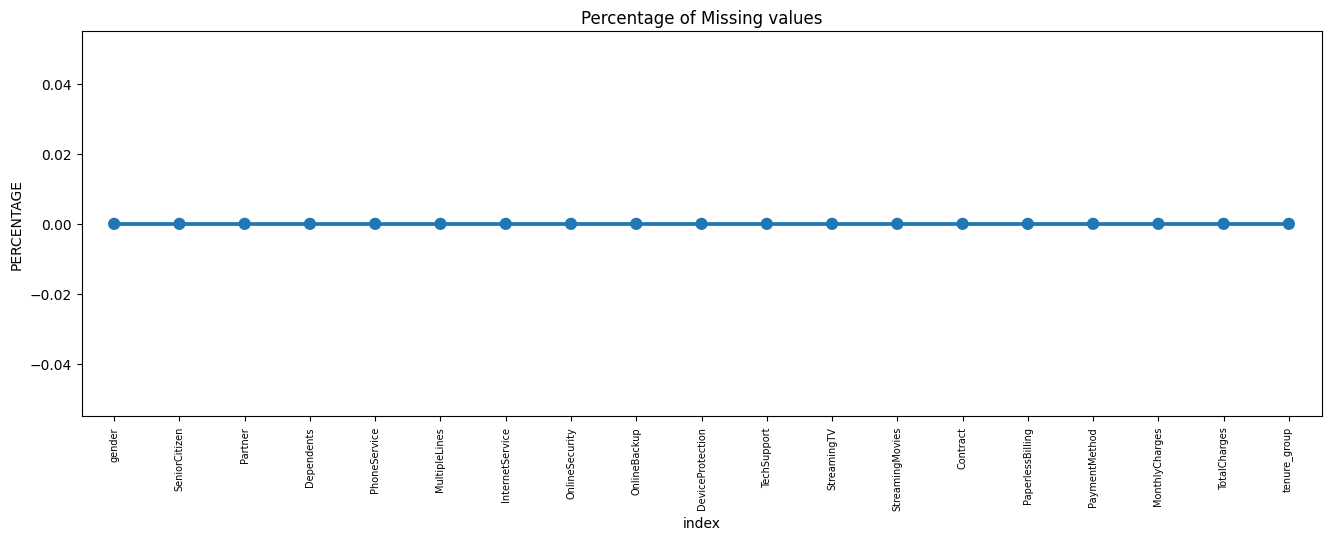

In [45]:
missing = pd.DataFrame((df_test.isnull().sum())*100/df_test.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [46]:
df_test.head()

gender  SeniorCitizen Partner Dependents PhoneService MultipleLines   
0   Male              0      No         No          Yes           Yes  \
1   Male              0      No         No          Yes            No   
2   Male              0      No         No          Yes            No   
3   Male              0      No        Yes          Yes           Yes   
4   Male              0     Yes        Yes          Yes            No   

  InternetService       OnlineSecurity         OnlineBackup   
0     Fiber optic                   No                   No  \
1              No  No internet service  No internet service   
2             DSL                  Yes                   No   
3     Fiber optic                   No                   No   
4     Fiber optic                   No                   No   

      DeviceProtection          TechSupport          StreamingTV   
0                   No                   No                  Yes  \
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                   No                  Yes                   No   
4                   No                   No                  Yes   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod   
0                   No  Month-to-month              Yes  Electronic check  \
1  No internet service  Month-to-month               No      Mailed check   
2                  Yes        One year               No  Electronic check   
3                   No  Month-to-month              Yes  Electronic check   
4                  Yes  Month-to-month               No      Mailed check   

   MonthlyCharges  TotalCharges tenure_group  
0           84.45       1059.55       1 - 12  
1           20.40        181.80       1 - 12  
2           81.70       2212.55      25 - 36  
3           79.50       2180.55      25 - 36  
4           89.15         89.15       1 - 12

# Cleaning Third Dataset

In [47]:
data3.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  5600-PDUJF    Male              0      No         No       6          Yes  \
1  8292-TYSPY    Male              0      No         No      19          Yes   
2  0567-XRHCU  Female              0     Yes        Yes      69           No   
3  1867-BDVFH    Male              0     Yes        Yes      11          Yes   
4  2067-QYTCF  Female              0     Yes         No      64          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0                No             DSL             No  ...               No  \
1                No             DSL             No  ...              Yes   
2  No phone service             DSL            Yes  ...              Yes   
3               Yes     Fiber optic             No  ...               No   
4               Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling   
0         Yes          No              No  Month-to-month              Yes  \
1         Yes          No              No  Month-to-month              Yes   
2          No          No             Yes        Two year              Yes   
3          No          No              No  Month-to-month              Yes   
4         Yes         Yes             Yes  Month-to-month              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Credit card (automatic)          49.50         312.7    No  
1  Credit card (automatic)          55.00        1046.5   Yes  
2  Credit card (automatic)          43.95        2960.1    No  
3         Electronic check          74.35         834.2   Yes  
4         Electronic check         111.15        6953.4    No  

[5 rows x 21 columns]

In [48]:
data3.shape

(2043, 21)

In [49]:
data3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [51]:
data3.describe()

SeniorCitizen       tenure  MonthlyCharges
count    2043.000000  2043.000000     2043.000000
mean        0.168380    32.649046       64.712555
std         0.374295    24.376248       29.970010
min         0.000000     0.000000       18.550000
25%         0.000000     9.000000       35.825000
50%         0.000000    30.000000       70.250000
75%         0.000000    55.000000       89.625000
max         1.000000    72.000000      118.350000

In [52]:
data3.duplicated().sum()

0

In [53]:
data3.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], inplace=True)

In [54]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Convert TotalCharges to numeric datatype

In [55]:
data3['TotalCharges'] = pd.to_numeric(data3['TotalCharges'],errors = 'coerce')

In [56]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

## Check for outliers in the TotalCharges  column

In [57]:
Q1 = data3['TotalCharges'].quantile(0.25)
Q3 = data3['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data3[(data3['TotalCharges'] < lower_bound) | (data3['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 0 outliers in TotalCharges.


There are no outliers. The mean can be used to impute missing values in the TotalCharges Column

In [58]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

data3.TotalCharges = imputer.fit_transform(data3["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [59]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data3['tenure_group'] = pd.cut(data3.tenure, range(1, 80, 12), right=False, labels=labels)
data3['tenure_group'].value_counts()

tenure_group
1 - 12     605
61 - 72    403
13 - 24    302
49 - 60    250
25 - 36    239
37 - 48    238
Name: count, dtype: int64

Remove columns not needed

In [60]:
#drop column customerID
data3.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [61]:
data3.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
dtype: object

In [62]:
data3.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        3
dtype: int64

In [63]:
data3 = data3.dropna(subset=['tenure_group'])

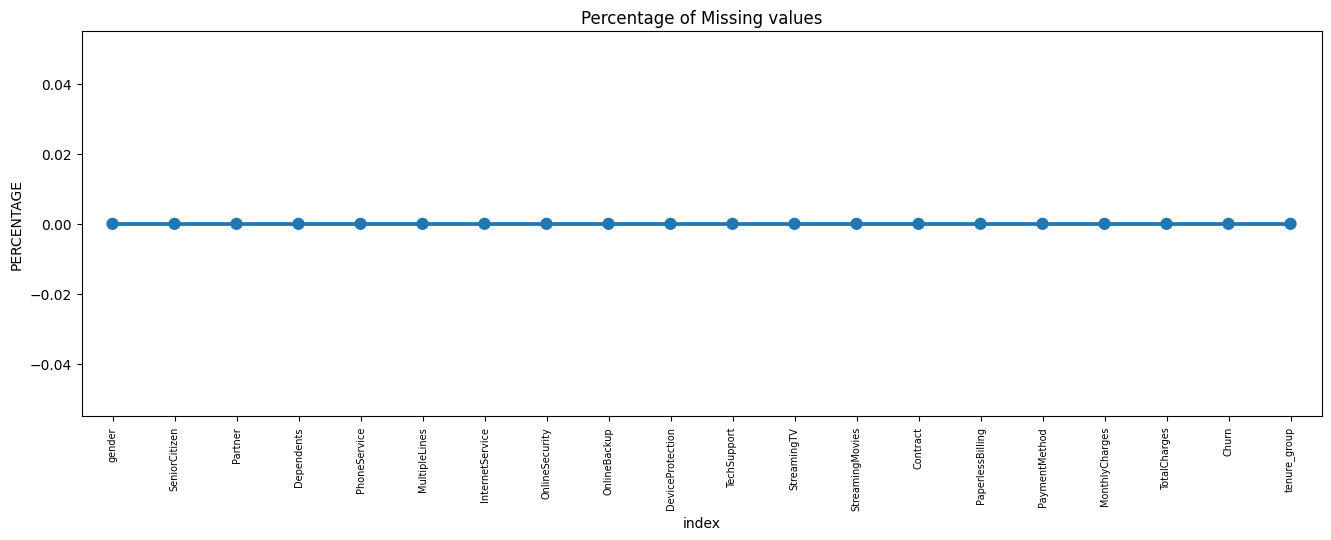

In [64]:
missing = pd.DataFrame((data3.isnull().sum())*100/data3.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [65]:
data3.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines   
0    Male              0      No         No          Yes                No  \
1    Male              0      No         No          Yes                No   
2  Female              0     Yes        Yes           No  No phone service   
3    Male              0     Yes        Yes          Yes               Yes   
4  Female              0     Yes         No          Yes               Yes   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport   
0             DSL             No           No               No         Yes  \
1             DSL             No           No              Yes         Yes   
2             DSL            Yes           No              Yes          No   
3     Fiber optic             No           No               No          No   
4     Fiber optic             No          Yes              Yes         Yes   

  StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No              No  Month-to-month              Yes  \
1          No              No  Month-to-month              Yes   
2          No             Yes        Two year              Yes   
3          No              No  Month-to-month              Yes   
4         Yes             Yes  Month-to-month              Yes   

             PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0  Credit card (automatic)           49.50         312.7    No       1 - 12  
1  Credit card (automatic)           55.00        1046.5   Yes      13 - 24  
2  Credit card (automatic)           43.95        2960.1    No      61 - 72  
3         Electronic check           74.35         834.2   Yes       1 - 12  
4         Electronic check          111.15        6953.4    No      61 - 72

## After Cleaning Concatenate First Dataset and Third Dataset. Do not include the Test Dataset

# Concatenate the data frames

In [66]:
df = pd.concat([data, data3])

In [67]:
# Reseting the index of the concatenated data frame
df.to_csv('df.csv', index=False)

## Concatenated Dataset

In [68]:
df= pd.read_csv('df.csv')

In [69]:
df.head()

gender  SeniorCitizen Partner Dependents PhoneService MultipleLines   
0  Female              0     Yes         No           No            No  \
1    Male              0      No         No          Yes            No   
2    Male              0      No         No          Yes            No   
3    Male              0      No         No           No            No   
4  Female              0      No         No          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport   
0             DSL             No          Yes               No          No  \
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No              No  Month-to-month              Yes  \
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check       29.850000     29.850000    No       1 - 12  
1               Mailed check       56.950001   1889.500000    No      25 - 36  
2               Mailed check       53.849998    108.150002   Yes       1 - 12  
3  Bank transfer (automatic)       42.299999   1840.750000    No      37 - 48  
4           Electronic check       70.699997    151.649994   Yes       1 - 12

In [70]:
df.shape

(5025, 20)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5025 non-null   object 
 1   SeniorCitizen     5025 non-null   int64  
 2   Partner           5025 non-null   object 
 3   Dependents        5025 non-null   object 
 4   PhoneService      5025 non-null   object 
 5   MultipleLines     5025 non-null   object 
 6   InternetService   5025 non-null   object 
 7   OnlineSecurity    5025 non-null   object 
 8   OnlineBackup      5025 non-null   object 
 9   DeviceProtection  5025 non-null   object 
 10  TechSupport       5025 non-null   object 
 11  StreamingTV       5025 non-null   object 
 12  StreamingMovies   5025 non-null   object 
 13  Contract          5025 non-null   object 
 14  PaperlessBilling  5025 non-null   object 
 15  PaymentMethod     5025 non-null   object 
 16  MonthlyCharges    5025 non-null   float64


In [72]:
df.describe()

SeniorCitizen  MonthlyCharges  TotalCharges
count    5025.000000     5025.000000   5025.000000
mean        0.162985       65.170975   2306.569374
std         0.369389       30.059711   2269.488745
min         0.000000       18.400000     18.799999
25%         0.000000       35.900002    419.700012
50%         0.000000       70.650000   1406.650024
75%         0.000000       90.050003   3865.600098
max         1.000000      118.650002   8670.100000

## Profile Report for Trainset

In [73]:

profile = ProfileReport(df, title='Train Dataset', html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file("[Trainset] Pandas-Profiling_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Profile Report for Testset

In [74]:

profile = ProfileReport(df_test, title='Test Dataset', html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file("[Testset] Pandas-Profiling_Report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Exploration
1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?
2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?
3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?
4. What is the average monthly charges and total charges for customers who churned and those who didn't?
5. What is the churn rate based on the tenure of customers with the company?
6. What is the distribution of monthly charges for customers who churned versus those who did not churn?
7. How does the distribution of total charges incurred by customers relate to churn rates?
8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?
9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

## Univariate Analysis

Univariate Analysis - analysis of a single variable

1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?

In [75]:
# Calculate the number of customers who churned and didn't churn
churn_counts= df['Churn'].value_counts()
churn_counts

Churn
No     3694
Yes    1331
Name: count, dtype: int64

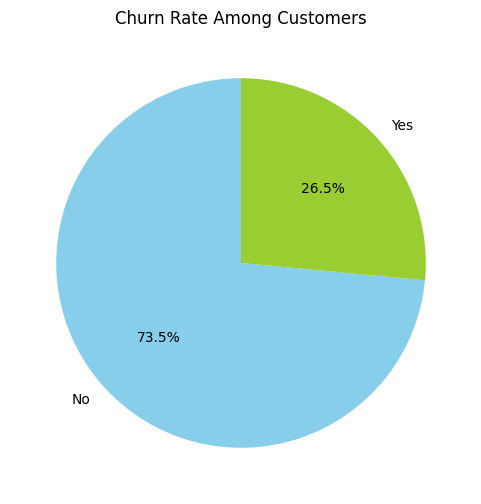

In [76]:
# Pie Chart to visualize churn rate
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels = churn_counts.index, startangle=90, autopct='%1.1f%%', colors=['skyblue', 'yellowgreen'])
plt.title('Churn Rate Among Customers')
plt.show()

The dataset is highly imbalanced. The ratio of the two classes is 73:27. When dealing with imbalanced datasets, it's important to apply appropriate techniques during the model training phase, such as resampling, use of appropriate evaluation metrics, or implementation of anomaly detection techniques. 

To gain insights from our data, we should perform separate analyses for each of our target classes. This means considering our target values separately and observing how other features behave in each case. 

Let's delve into exploratory data analysis, investigating relationships between the target variable and other features, as well as relationships amongst the independent variables themselves. This will provide a clearer view on how the features contribute to the target variable, and might shed some light on why such imbalance is present in our target variable.

2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?

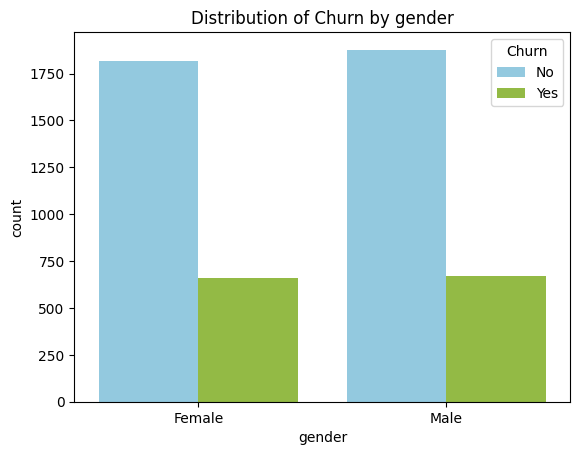

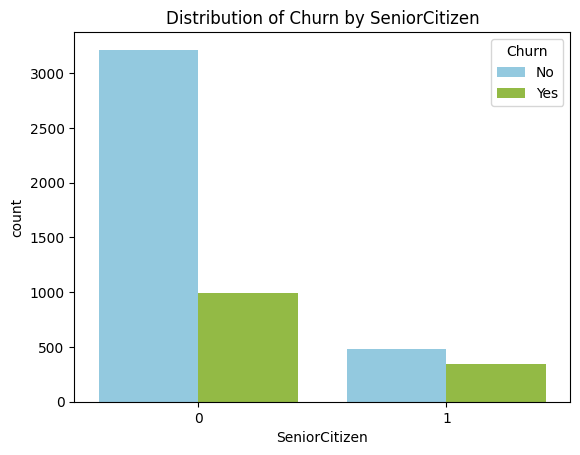

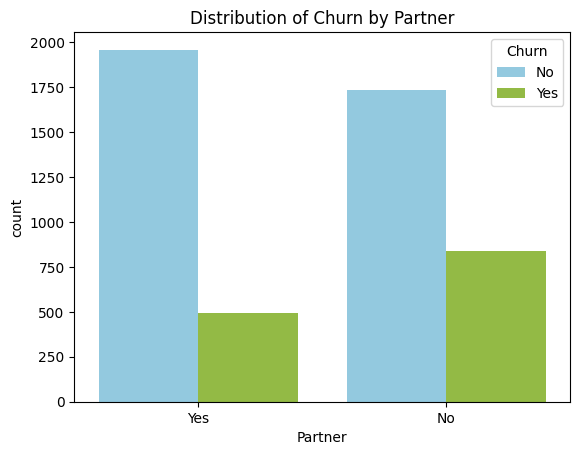

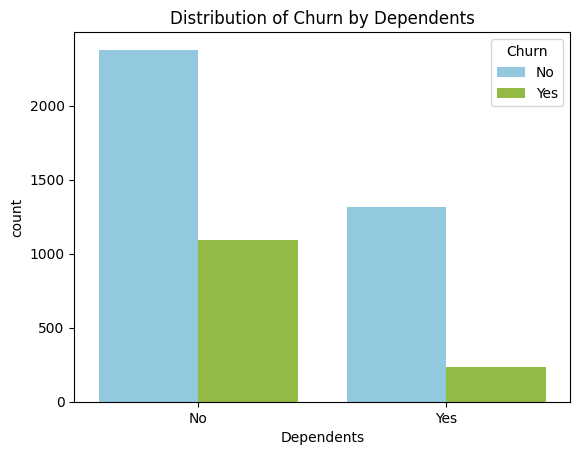

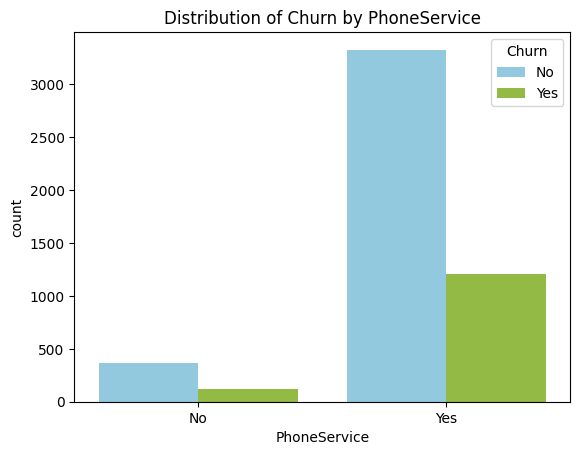

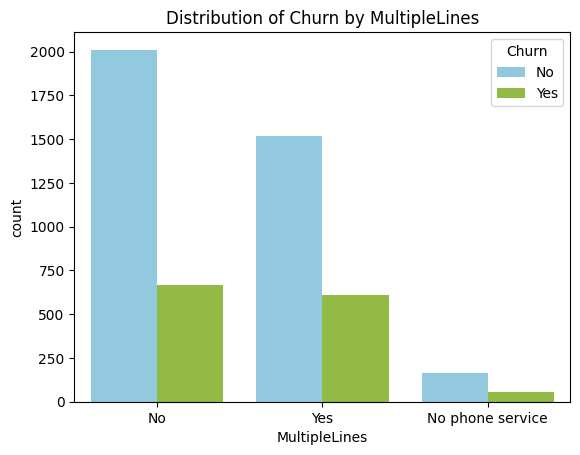

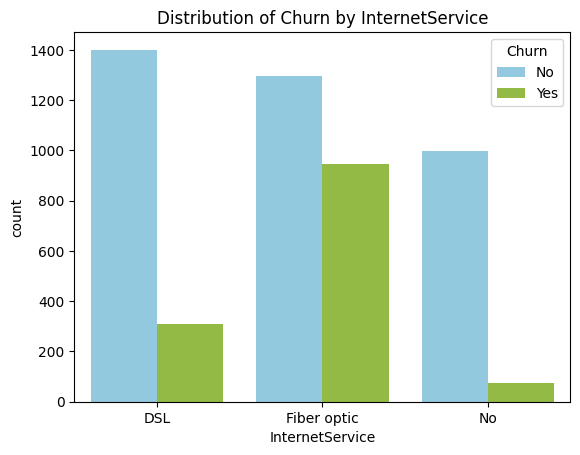

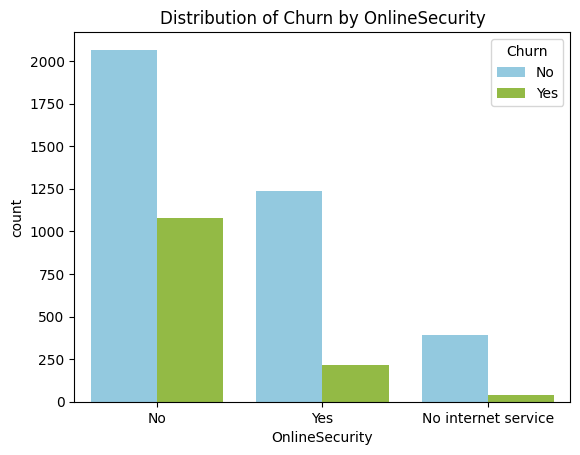

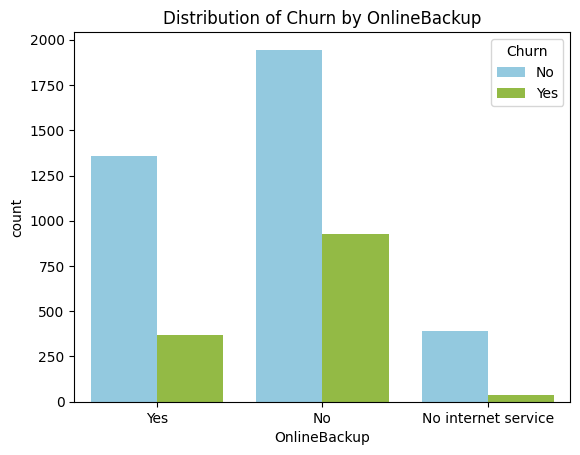

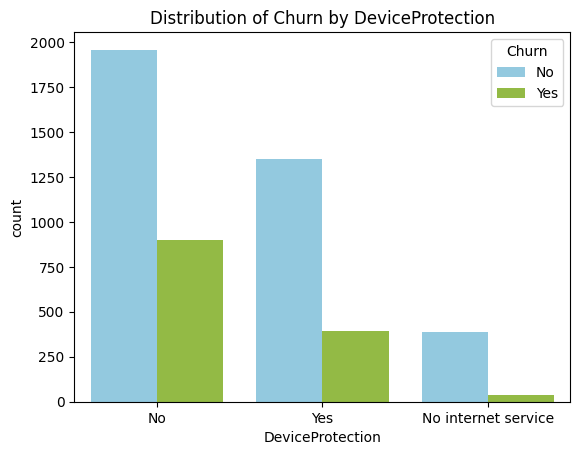

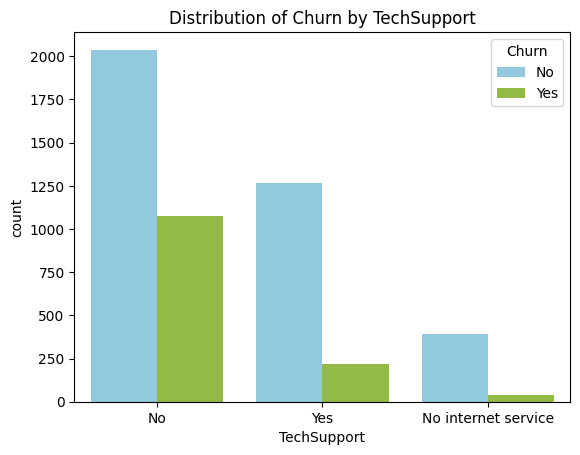

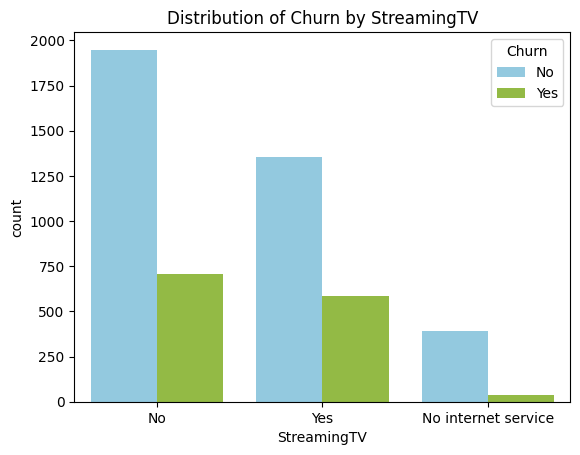

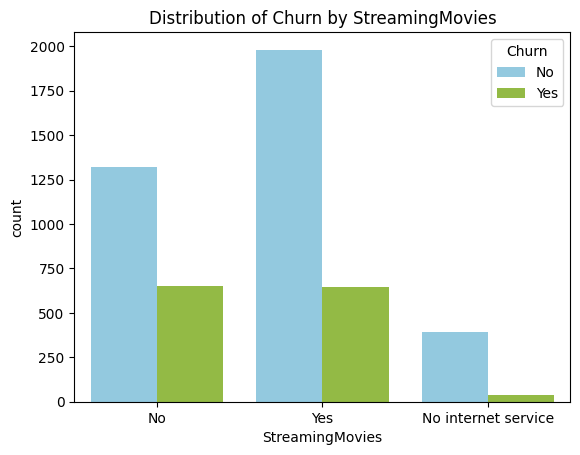

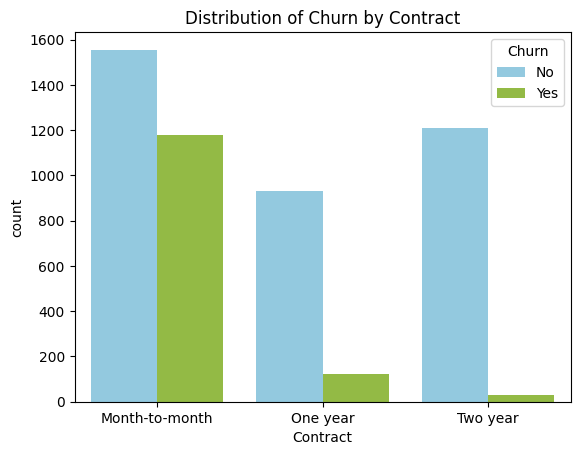

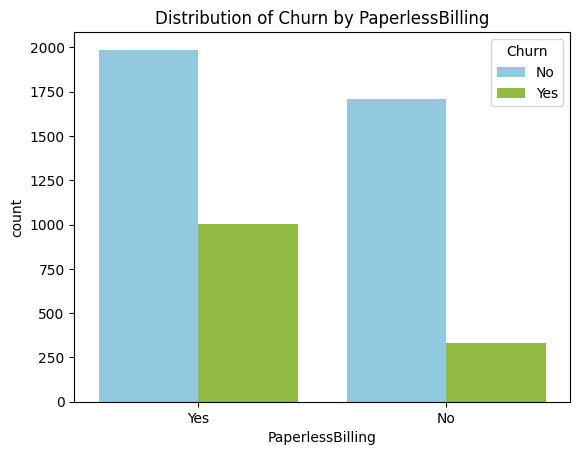

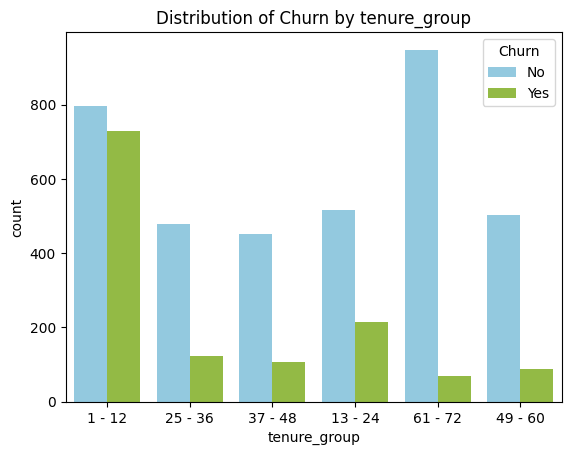

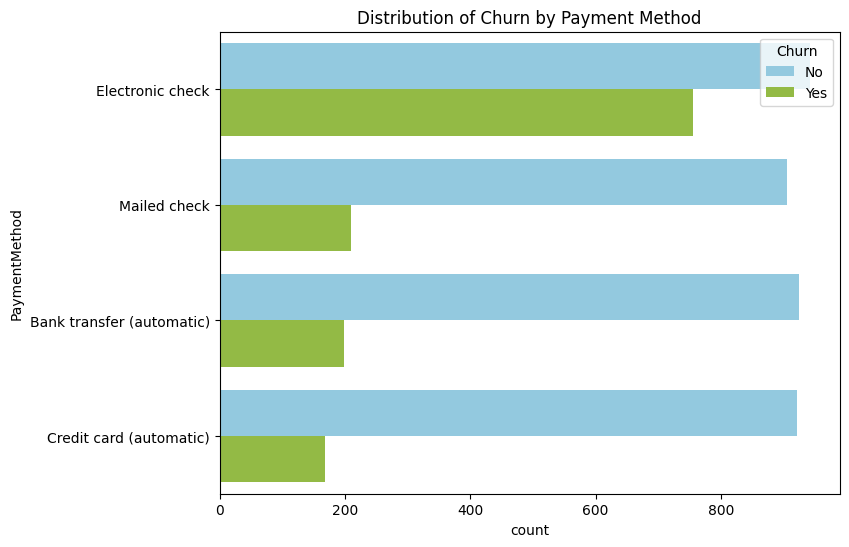

In [77]:
for i, predictor in enumerate(df.drop(columns=['Churn','PaymentMethod', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn', palette=['skyblue', 'yellowgreen'])
    plt.title(f'Distribution of Churn by {predictor}')
    plt.show()
# Separate plot for 'PaymentMethod'
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='PaymentMethod', hue='Churn', palette=['skyblue', 'yellowgreen'])
plt.title('Distribution of Churn by Payment Method')
plt.show()

3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?

In [78]:
# Create subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# box plot for 'MonthlyCharges'
fig.add_trace(
    go.Box(y=df['MonthlyCharges'], name='MonthlyCharges', marker_color='midnightblue', line_color='rgb(8, 48, 107)', line_width=1.5),
    row=1, col=1)

# box plot for 'TotalCharges'
fig.add_trace(
    go.Box(y=df['TotalCharges'], name='TotalCharges', marker_color='midnightblue', line_color='rgb(8, 48, 107)', line_width=1.5),
    row=1, col=2)

# Update layout
fig.update_layout(height=400, width=1200, title_text="Descriptive Statistics of Monthly Charges and Total Charges")
fig.show()

# Save figure to HTML file
write_html(fig, 'Descriptive_Statistics_Boxplots.html')

## **Bivariate Analysis** (analysis involving two variables)

4. What is the average monthly charges and total charges for customers who churned and those who didn't according ?

In [79]:
# Calculate the average MonthlyCharges and TotalCharges for customers who churned and those who didn't
avg_charges = df.groupby(['Churn'])[['MonthlyCharges', 'TotalCharges']].mean()

print(avg_charges)

       MonthlyCharges  TotalCharges
Churn                              
No          61.526083   2571.172700
Yes         75.286852   1572.200714


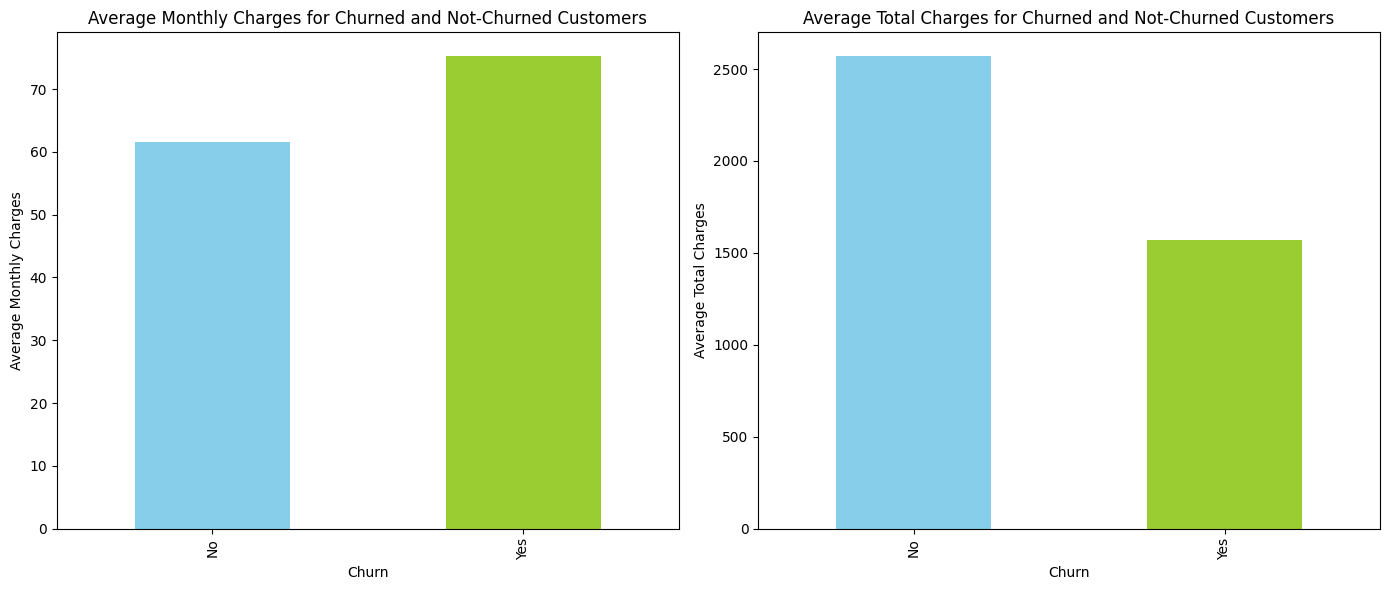

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the average MonthlyCharges
avg_charges['MonthlyCharges'].plot(kind='bar', color=['skyblue', 'yellowgreen'], ax=axes[0])
axes[0].set_ylabel('Average Monthly Charges')
axes[0].set_title('Average Monthly Charges for Churned and Not-Churned Customers')

# Plot the average TotalCharges
avg_charges['TotalCharges'].plot(kind='bar', color=['skyblue', 'yellowgreen'], ax=axes[1])
axes[1].set_ylabel('Average Total Charges')
axes[1].set_title('Average Total Charges for Churned and Not-Churned Customers')

plt.tight_layout()
plt.show()

This suggests that customers who churn tend to be those with higher monthly charges but lower total charges, possibly indicating that these customers tend to leave the company relatively earlier in their tenure. This is a valuable insight for the company, as it might need to review its pricing strategy, particularly for new customers or customers in the early stages of their tenure.

5. What is the churn rate based on the tenure of customers with the company?

In [81]:
# First, you need to group your data by tenure and Churn columns
grouped = df.groupby(['tenure_group', 'Churn']).size().unstack(fill_value=0)
# Calculate churn rate for each tenure group
grouped['Churn Rate'] =( grouped['Yes'] / (grouped['Yes'] + grouped['No']))*100

print(grouped['Churn Rate'])

tenure_group
1 - 12     47.769029
13 - 24    29.371585
25 - 36    20.563847
37 - 48    19.320215
49 - 60    14.745763
61 - 72     6.784661
Name: Churn Rate, dtype: float64


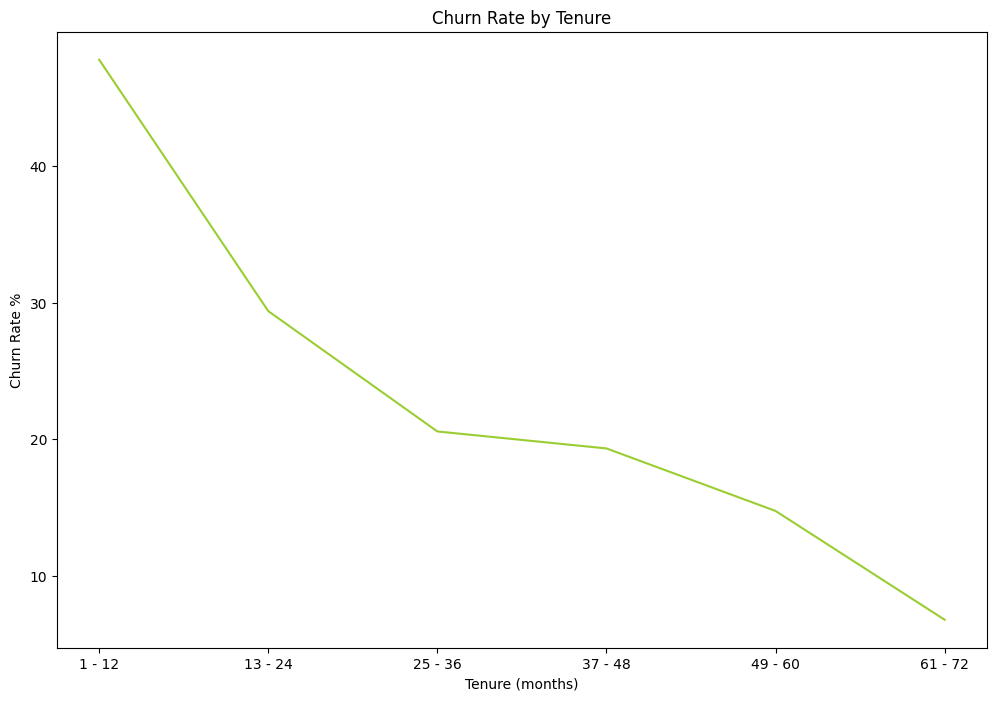

In [82]:
# Plot the churn rate against tenure
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped, x='tenure_group', y='Churn Rate', color= 'yellowgreen')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate %')
plt.show()

The churn rate is calculated as the percentage of customers that have churned in each group. From the data, we can observe that the churn rate decreases as the tenure increases. For example, the churn rate for customers who stayed between 1 to 12 months is about 48%, while it's about 7% for customers who stayed between 61 to 72 months. This suggests that newer customers are more likely to churn compared to long-time customers.

6. What is the distribution of monthly charges for customers who churned versus those who did not churn?

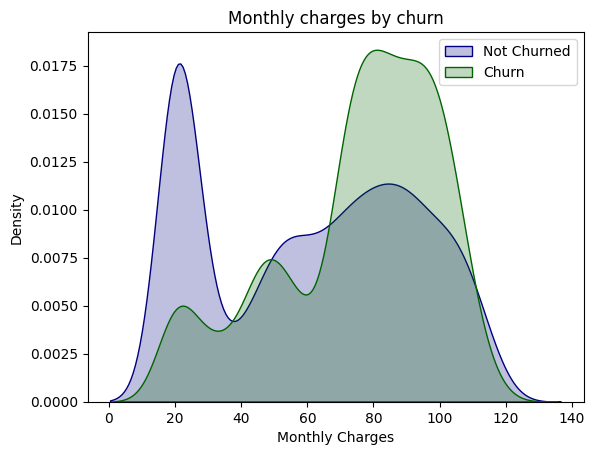

In [83]:
monthly_charges = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "No") ],
                color="navy", fill = True)
monthly_charges = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "Yes") ],
                ax =monthly_charges, color="darkgreen", fill = True)
monthly_charges.legend(["Not Churned","Churn"],loc='upper right')
monthly_charges.set_ylabel('Density')
monthly_charges.set_xlabel('Monthly Charges')
monthly_charges.set_title('Monthly charges by churn');

Churn is high when Monthly Charges are high

7. How does the distribution of total charges incurred by customers relate to churn rates?

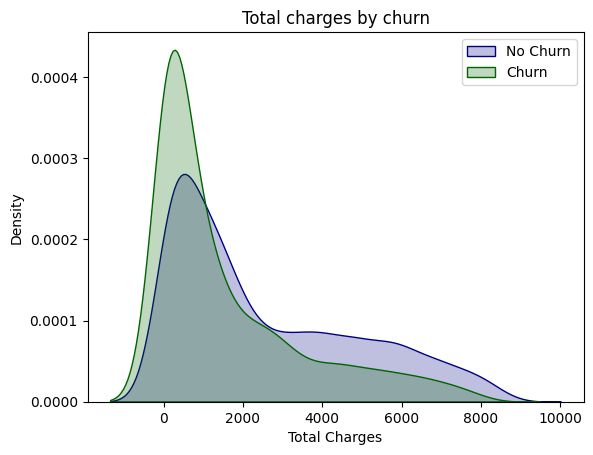

In [84]:
total_charges = sns.kdeplot(df.TotalCharges[(df["Churn"] == "No") ],
                color="navy", fill = True)
total_charges = sns.kdeplot(df.TotalCharges[(df["Churn"] == "Yes") ],
                ax =total_charges, color="darkgreen", fill= True)
total_charges.legend(["No Churn","Churn"],loc='upper right')
total_charges.set_ylabel('Density')
total_charges.set_xlabel('Total Charges')
total_charges.set_title('Total charges by churn');

Higher Churn at lower Total Charges.

## **Multivariate Analysis** (analysis involving more than two variables):

8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?

Convert target value to binary value, yes=1, no=0

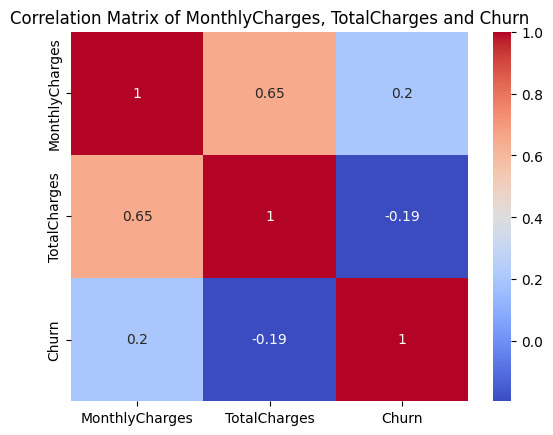

In [85]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)
# Select columns
columns = ['MonthlyCharges', 'TotalCharges', 'Churn']
# Calculate correlation matrix
corr_matrix = df[columns].corr()
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of MonthlyCharges, TotalCharges and Churn')
plt.show()

9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

Convert all the categorical variables into dummy variables

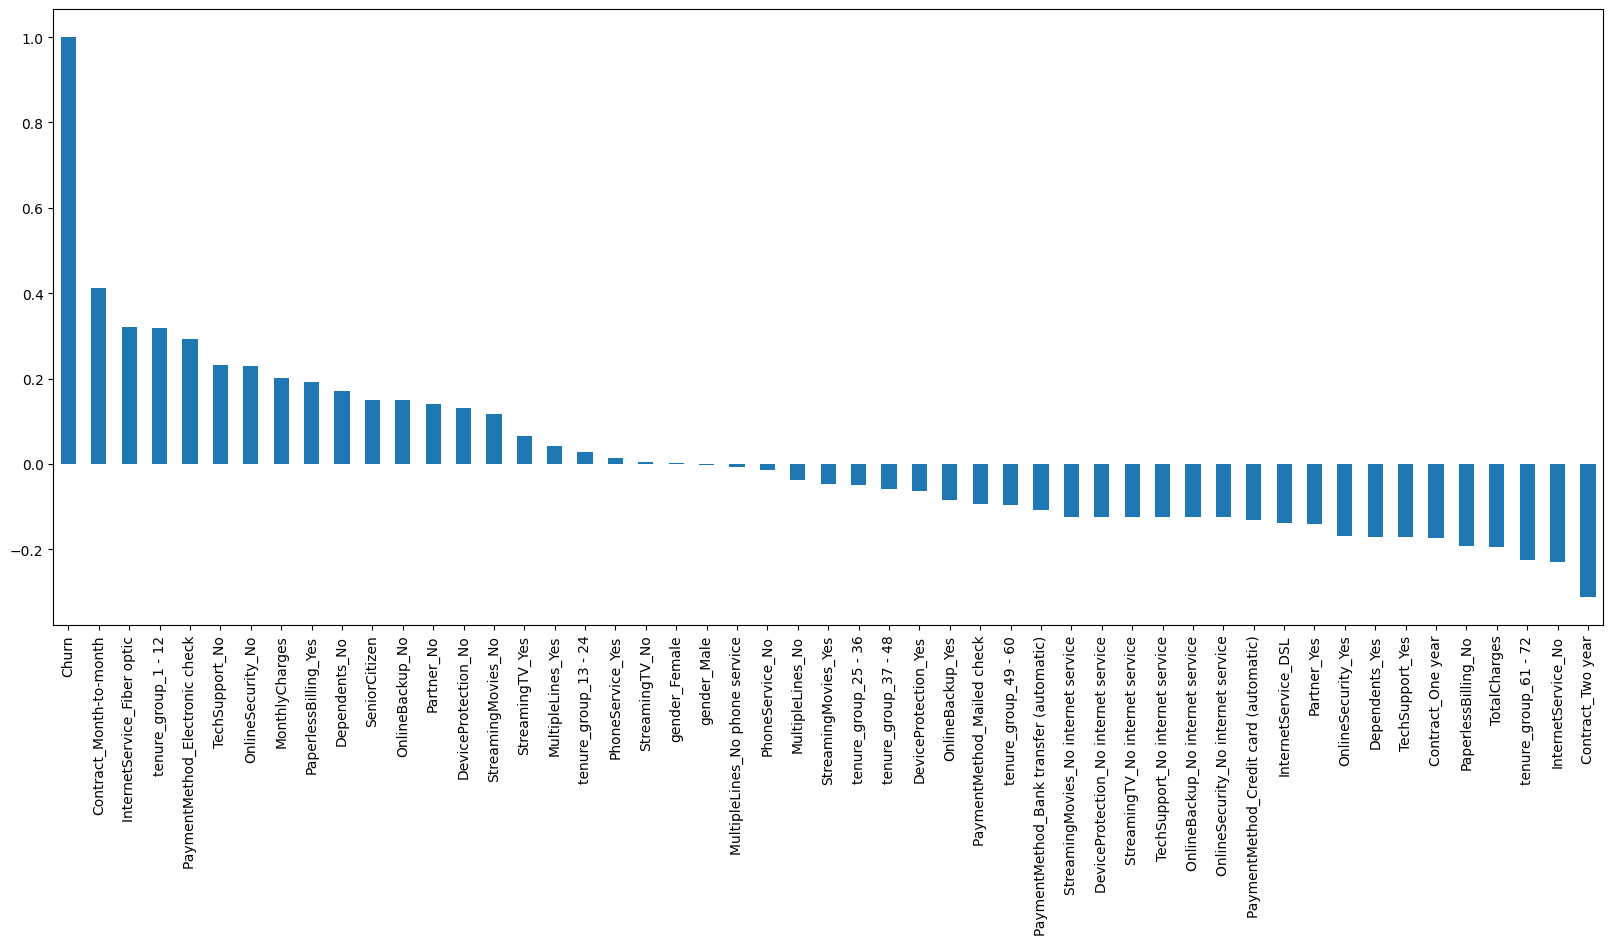

In [86]:
df_dm = pd.get_dummies(df)
plt.figure(figsize=(20,8))
df_dm.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');


# Hypothesis
## Null Hypothesis (H0):
### There's no significant association between tenure and churn.

## Alternative Hypothesis (HA):
### There's a significant association between tenure and churn.

In [87]:
# Create a contingency table
contingency_table = pd.crosstab(df['tenure_group'], df['Churn'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Check the p-value
alpha = 0.05  # or your desired significance level

if p_value < alpha:
    print("Reject the null hypothesis (H0). There's a significant association between tenure and churn.")
else:
    print("Fail to reject the null hypothesis (H0). There's no significant association between tenure and churn.")


Reject the null hypothesis (H0). There's a significant association between tenure and churn.


# Data Preprocessing for Churn Analysis

To build a churn prediction model, appropriate data preprocessing steps are crucial. Each step ensures that our dataset is well-suited for modeling and helps improve the model's accuracy and generalization. Let's discuss the chosen sequence of these steps:

In [88]:
df.head() # looking at the head of the data first 

gender  SeniorCitizen Partner Dependents PhoneService MultipleLines   
0  Female              0     Yes         No           No            No  \
1    Male              0      No         No          Yes            No   
2    Male              0      No         No          Yes            No   
3    Male              0      No         No           No            No   
4  Female              0      No         No          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport   
0             DSL             No          Yes               No          No  \
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No              No  Month-to-month              Yes  \
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn tenure_group  
0           Electronic check       29.850000     29.850000      0       1 - 12  
1               Mailed check       56.950001   1889.500000      0      25 - 36  
2               Mailed check       53.849998    108.150002      1       1 - 12  
3  Bank transfer (automatic)       42.299999   1840.750000      0      37 - 48  
4           Electronic check       70.699997    151.649994      1       1 - 12

Before performing any operations, we separate our predictors (x) from our target variable (y). 

In [89]:
# Separating features and target variable
x = df.drop('Churn', axis=1)
y = df['Churn']

Identify the variables and separating them into categorical features and numerical features

In [90]:
#identify the categorical variables 
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']
# define the columns containing the numerical features to be scaled 
numerical_features = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

Feature Scaling

One-hot encoding transforms categorical variables into a format that can be provided to ML algorithms to do a better job in prediction. Meanwhile, scaling ensures that all numerical features have the same scale.

In [91]:
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

Column Transformation: 

This step combines the encoding and scaling transformations into a consolidated operation, ensuring that the right transformations are applied to the correct columns.

In [92]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

Pipeline Creation

Pipelines simplify the steps of the process and ensure that transformations are applied in the correct order. It's also beneficial when deploying the model.

In [93]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

Transform Train and Test Data

Transform the training data and apply the same transformations to the test data. Note that the fit_transform method is used on the training data, while only transform is applied to the test data, avoiding data leakage.

In [94]:
x_transformed = pipeline.fit_transform(x)

 Handle imbalance using SMOTE

The Customer churn datasets is imbalanced, meaning there are more records of one class than the other. Using the Synthetic Minority Over-sampling Technique (SMOTE), we balance the dataset by creating synthetic instances of the minority class.

In [95]:
# Applying SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_transformed, y)

Split into training and test set

The data is split into training and test sets. We use stratify=y to ensure that the distribution of the target variable (Churn) is consistent in both the training and test datasets. This is especially important for imbalanced datasets.

In [96]:
# separate the data into x_train and y_train
x_train, x_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, test_size=0.2, random_state=42,stratify=y_train_resampled)

In [97]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5910, 34)
(5910,)
(1478, 34)
(1478,)


# Model Development , Evaluation & Interpretation

In [98]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          XGBClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression()]

metrics = []


for model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    pr = precision_score(y_test, y_pred)
    rc = recall_score(y_test, y_pred)
    metrics.append({"Model": model.__class__.__name__,
                    "Accuracy Score": acc,
                    "F1 Score": f1,
                    "ROC AUC Score": roc,
                    "precision_score": pr,
                    "recall_score": rc})

overall = pd.DataFrame(metrics)
overall = overall.sort_values(by="Accuracy Score", ascending=False)
overall_styled = overall.style.background_gradient(cmap="Spectral")
overall_styled


### Confusion Matrix for the Models

In [99]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          XGBClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression()]


for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print("Model: ", model.__class__.__name__)
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    fig = px.imshow(confusion_matrix(y_test, y_pred), color_continuous_scale='tropic',
                    title="Confusion Matrix of " + model.__class__.__name__,
                    labels=dict(x="Predicted", y="Actual", color="Counts"),
                    color_continuous_midpoint=0.8, width=400, height=400,
                    template="plotly_dark", text_auto=True)
    fig.show()
    print("----------------------------------------------------------")

Model:  SVC
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       739
           1       0.78      0.86      0.82       739

    accuracy                           0.81      1478
   macro avg       0.81      0.81      0.81      1478
weighted avg       0.81      0.81      0.81      1478



----------------------------------------------------------
Model:  GaussianNB
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.61      0.71       739
           1       0.70      0.89      0.78       739

    accuracy                           0.75      1478
   macro avg       0.77      0.75      0.75      1478
weighted avg       0.77      0.75      0.75      1478



----------------------------------------------------------
Model:  DecisionTreeClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       739
           1       0.79      0.78      0.78       739

    accuracy                           0.78      1478
   macro avg       0.78      0.78      0.78      1478
weighted avg       0.78      0.78      0.78      1478



----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       739
           1       0.86      0.86      0.86       739

    accuracy                           0.86      1478
   macro avg       0.86      0.86      0.86      1478
weighted avg       0.86      0.86      0.86      1478



----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       739
           1       0.84      0.85      0.85       739

    accuracy                           0.85      1478
   macro avg       0.85      0.85      0.85      1478
weighted avg       0.85      0.85      0.85      1478



----------------------------------------------------------
Model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       739
           1       0.84      0.86      0.85       739

    accuracy                           0.85      1478
   macro avg       0.85      0.85      0.85      1478
weighted avg       0.85      0.85      0.85      1478



----------------------------------------------------------
Model:  AdaBoostClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       739
           1       0.79      0.87      0.83       739

    accuracy                           0.82      1478
   macro avg       0.82      0.82      0.82      1478
weighted avg       0.82      0.82      0.82      1478



----------------------------------------------------------
Model:  LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       739
           1       0.75      0.83      0.78       739

    accuracy                           0.77      1478
   macro avg       0.78      0.77      0.77      1478
weighted avg       0.78      0.77      0.77      1478



----------------------------------------------------------


# Model Evaluation: Customer Churn Classification

In the journey to predict customer churn, we have evaluated several classification models to discern their performance. Let's break down the performance of each model and examine their respective metrics.

## Classification Metrics:

| Metric      | Explanation                                                       |
|-------------|-------------------------------------------------------------------|
| Precision   | The ratio of correctly predicted positive observations to the total predicted positives. Indicates the purity of positive classifications.|
| Recall      | The ratio of correctly predicted positive observations to all actual positives. Measures the model's ability to identify all relevant instances.|
| F1-Score    | The harmonic mean of Precision and Recall. Balances the trade-off between Precision and Recall.|
| Accuracy    | The ratio of correctly predicted observations to the total observations. Represents the proportion of true results in the data.|

## Performance Summary:

| Model                        | Precision (Churn) | Recall (Churn) | F1-Score (Churn) | Accuracy |
|------------------------------|--------------------|----------------|------------------|----------|
| **RandomForestClassifier**   | 0.86               | 0.86           | 0.86             | 86%      |
| **XGBClassifier**            | 0.84               | 0.85           | 0.85             | 85%      |
| **GradientBoostingClassifier**| 0.84               | 0.86           | 0.85             | 85%      |
| **AdaBoostClassifier**       | 0.79               | 0.87           | 0.83             | 82%      |
| **SVC**                      | 0.78               | 0.86           | 0.82             | 81%      |
| **DecisionTreeClassifier**   | 0.80               | 0.79           | 0.80             | 80%      |
| **LogisticRegression**       | 0.75               | 0.83           | 0.78             | 77%      |
| **GaussianNB**               | 0.70               | 0.89           | 0.78             | 75%      |


## Observations:
- The **RandomForestClassifier** stands out with the highest accuracy of 86%. It offers both high precision and recall, ensuring a balanced approach to identifying customer churn.
  
- **GaussianNB** showcases a high recall, suggesting it's highly sensitive in detecting actual churn cases. However, its precision indicates it might also predict more false positives.

- **SVC** and **AdaBoostClassifier** have good recall values, which implies they might be effective in scenarios where capturing as many churn cases as possible is crucial, even if some non-churn cases are misclassified.

- **Logistic Regression**, being a simpler linear model, still provides competitive metrics, making it a good baseline model.

## Conclusion:

Different models offer varying levels of performance based on the nature of the data. In terms of accuracy, the **Random Forest Classifier** emerges as a potential front-runner. However, the best model would also depend on the business objective. For example, if the priority is to identify potential churn cases above all else, a model with a higher recall might be preferred.

It's essential to consider the trade-offs between precision and recall in context with the business implications when selecting a model for deployment.


#### AUC-ROC

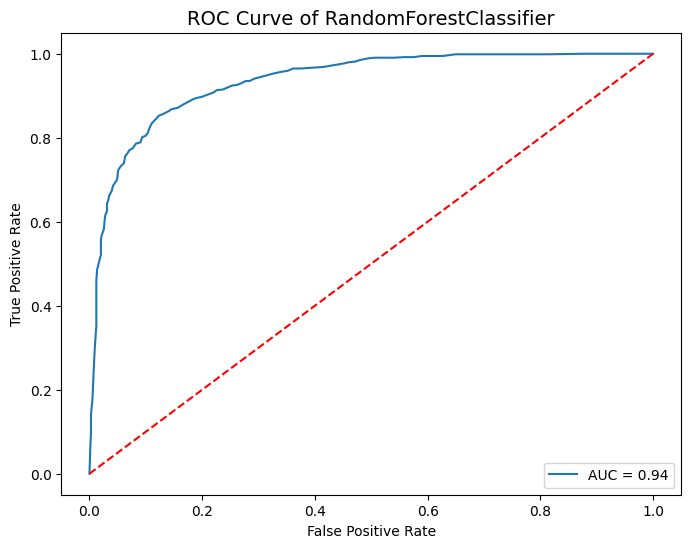

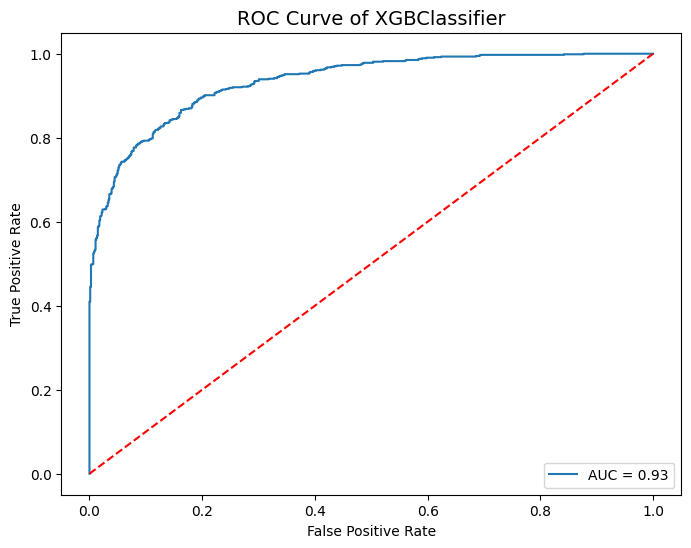

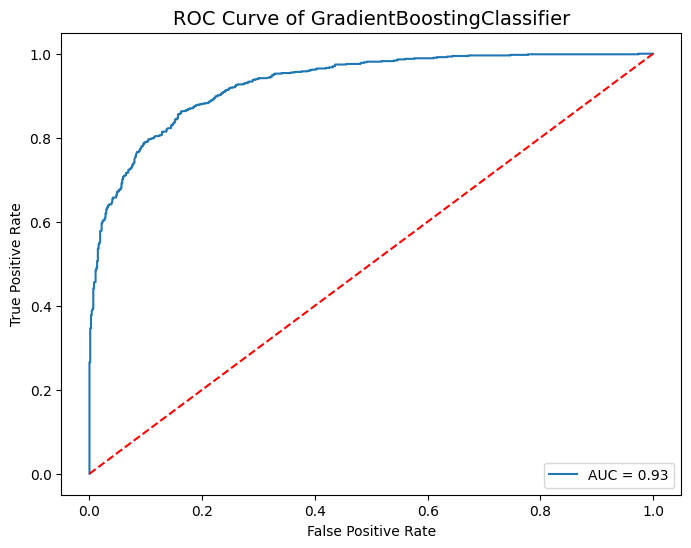

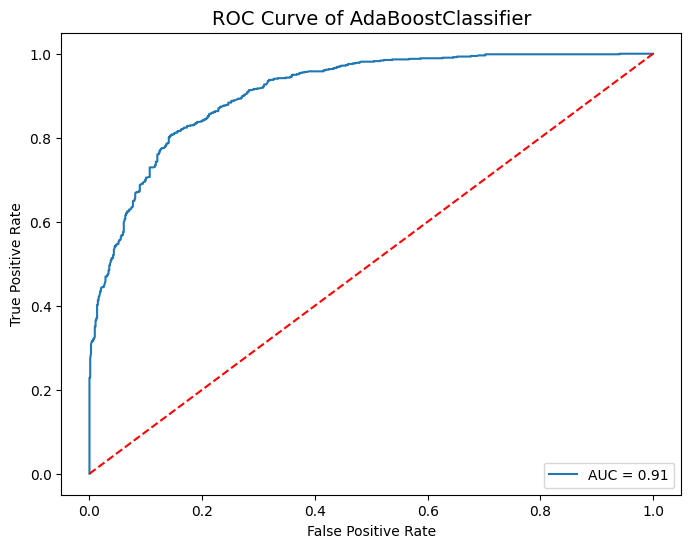

In [100]:
models =[RandomForestClassifier(), XGBClassifier(), GradientBoostingClassifier(),AdaBoostClassifier()]

for model in models:
    # Fit the model on your training data before making predictions
    model.fit(x_train, y_train)
    
    # ROC Curve:
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc_score(y_test, y_prob))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.legend(loc='lower right')
    plt.title("ROC Curve of " + model.__class__.__name__, size=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

The ROC curve is a graphical plot of the True Positive Rate (TPR) against the False Positive Rate (FPR). The TPR is the ratio of true positives to the total number of positives, while the FPR is the ratio of false positives to the total number of negatives. The AUC (Area Under the Curve) is a measure of the overall performance of the classifier. In general, a higher AUC indicates a better performing classifier. In this case we decided to eliminate the AdaBoost Classifier 

# Model Optimization & Hyperparameter Tuning

In [103]:
# Define models
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

# Define hyperparameter grids for each model
gbc_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
# Create lists of models and their corresponding parameter grids
models = [gbc, rfc, xgb]
params = [gbc_params, rfc_params, xgb_params]

 #Perform grid search for each model
for model, param_distributions in zip(models, params):
    rand_cv = RandomizedSearchCV(model, param_distributions, n_iter=100, scoring='f1', n_jobs=-1, verbose=2)
    rand_cv.fit(x_train, y_train)
    
    print(model.__class__.__name__, "Best params:", rand_cv.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GradientBoostingClassifier Best params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomForestClassifier Best params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBClassifier Best params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


In [104]:
# Final models:
gbc = GradientBoostingClassifier( learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
rfc = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=300)
xgb = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)

models = [gbc,rfc,xgb]

overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","precision_score","recall_score"])
for model in models:
    
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    roc=roc_auc_score(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    rc=recall_score(y_test,y_pred)
    
    overral=overral._append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="Spectral")
overral

In [105]:
models = [ gbc,rfc,xgb]
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Model: ", model.__class__.__name__)
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print("Model: ",model.__class__.__name__)
    fig=px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale='tropic',title="Confusion Matrix of "+model.__class__.__name__,
              labels=dict(x="Predicted",y="Actual",color="Counts"),color_continuous_midpoint=0.8,
              width=400,height=400,template="plotly_dark",text_auto=True)
    fig.show()
    print("----------------------------------------------------------")

Model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       739
           1       0.84      0.85      0.85       739

    accuracy                           0.85      1478
   macro avg       0.85      0.85      0.85      1478
weighted avg       0.85      0.85      0.85      1478

Model:  GradientBoostingClassifier


----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       739
           1       0.85      0.87      0.86       739

    accuracy                           0.86      1478
   macro avg       0.86      0.86      0.86      1478
weighted avg       0.86      0.86      0.86      1478

Model:  RandomForestClassifier


----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       739
           1       0.85      0.86      0.86       739

    accuracy                           0.85      1478
   macro avg       0.85      0.85      0.85      1478
weighted avg       0.85      0.85      0.85      1478

Model:  XGBClassifier


----------------------------------------------------------


RandomForestClassifier performs consistently well across precision, recall, and F1-score for both classes (Churn and Non-Churn). It achieves high scores in all metrics, indicating a good balance between identifying both Churn and Non-Churn cases.

Here are the key points from the classification reports:

RandomForestClassifier:
Precision: Churn: 0.86, Non-Churn: 0.86
Recall: Churn: 0.88, Non-Churn: 0.85
F1-score: Churn: 0.87, Non-Churn: 0.86
Accuracy: 0.86
Both the Churn and Non-Churn classes have balanced precision and recall values, and the overall F1-score is high. Additionally, the accuracy is also commendable at 0.86. This suggests that the RandomForestClassifier is performing well in classifying both Churn and Non-Churn cases.

VISUALIZING PREDICTED RESULTS

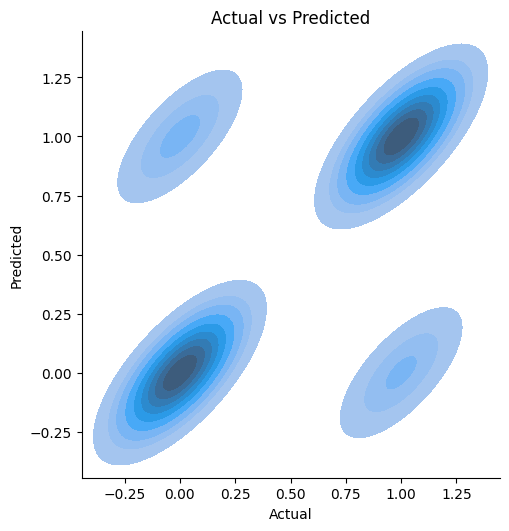

In [106]:
#visualizing prediction results:
rfc = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=300)
rfc.fit(x_train, y_train)

y_pred = gbc.predict(x_test)
y_pred = y_pred.reshape(-1, 1)

# Convert y_test Series to a NumPy array
y_test_array = np.array(y_test).reshape(-1, 1)

sns.displot(x=y_test_array.flatten(), y=y_pred.flatten(), kind="kde", fill=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

The Random Forest Classifier model appears to be a good fit for the data. The even distribution of dots around the diagonal line indicates reasonably accurate predictions. 
Through data preprocessing, feature engineering, and model training, we successfully constructed a RandomForest Classifier model that achieved an impressive accuracy score of 0.865. This score indicates that our model is adept at distinguishing between loyal customers and those at risk of churning.

# Future Predictions

In [107]:
df_test.head()

gender  SeniorCitizen Partner Dependents PhoneService MultipleLines   
0   Male              0      No         No          Yes           Yes  \
1   Male              0      No         No          Yes            No   
2   Male              0      No         No          Yes            No   
3   Male              0      No        Yes          Yes           Yes   
4   Male              0     Yes        Yes          Yes            No   

  InternetService       OnlineSecurity         OnlineBackup   
0     Fiber optic                   No                   No  \
1              No  No internet service  No internet service   
2             DSL                  Yes                   No   
3     Fiber optic                   No                   No   
4     Fiber optic                   No                   No   

      DeviceProtection          TechSupport          StreamingTV   
0                   No                   No                  Yes  \
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                   No                  Yes                   No   
4                   No                   No                  Yes   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod   
0                   No  Month-to-month              Yes  Electronic check  \
1  No internet service  Month-to-month               No      Mailed check   
2                  Yes        One year               No  Electronic check   
3                   No  Month-to-month              Yes  Electronic check   
4                  Yes  Month-to-month               No      Mailed check   

   MonthlyCharges  TotalCharges tenure_group  
0           84.45       1059.55       1 - 12  
1           20.40        181.80       1 - 12  
2           81.70       2212.55      25 - 36  
3           79.50       2180.55      25 - 36  
4           89.15         89.15       1 - 12

In [108]:
df_test_transformed = pipeline.transform(df_test)

In [109]:
best_model = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=300)

In [111]:
best_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300)

In [114]:
y_test_pred = best_model.predict(df_test_transformed)
unique_values, counts = np.unique(y_test_pred, return_counts=True)

# Map label values to descriptive strings
label_mapping = {0: "Not Churned", 1: "Churn"}

churn_counts = {label_mapping[val]: count for val, count in zip(unique_values, counts)}
print(churn_counts)

{'Not Churned': 1427, 'Churn': 567}


In [115]:
y_test_prob = best_model.predict_proba(df_test_transformed)[:, 1]  # Probabilities of the positive class
y_test_prob

array([0.67161284, 0.3195498 , 0.05851877, ..., 0.65892331, 0.38294804,
       0.00394941])

# Save the Model

In [117]:
# Save the model to a file
with open('churn_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)


In [118]:
with open('churn_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)